In [1]:
import numpy as np
import matplotlib.pyplot as plt


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, Activation
import tensorflow as tf
%matplotlib inline


data_url = 'https://raw.githubusercontent.com/PacktPublishing/Mastering-Deep-Learning-with-TensorFlow-2.0/master/datasets/wolfer-sunspot-numbers.csv'

#Source: https://datamarket.com/data/set/22wh/wolfer-sunspot-numbers-1770-to-1869#!ds=22wh&display=line
dataset = np.loadtxt(data_url)

In [2]:
#Normalize
dataset = (dataset - min(dataset)) / (max(dataset)-min(dataset))

Text(0, 0.5, 'Normalized Sunspot Numbers')

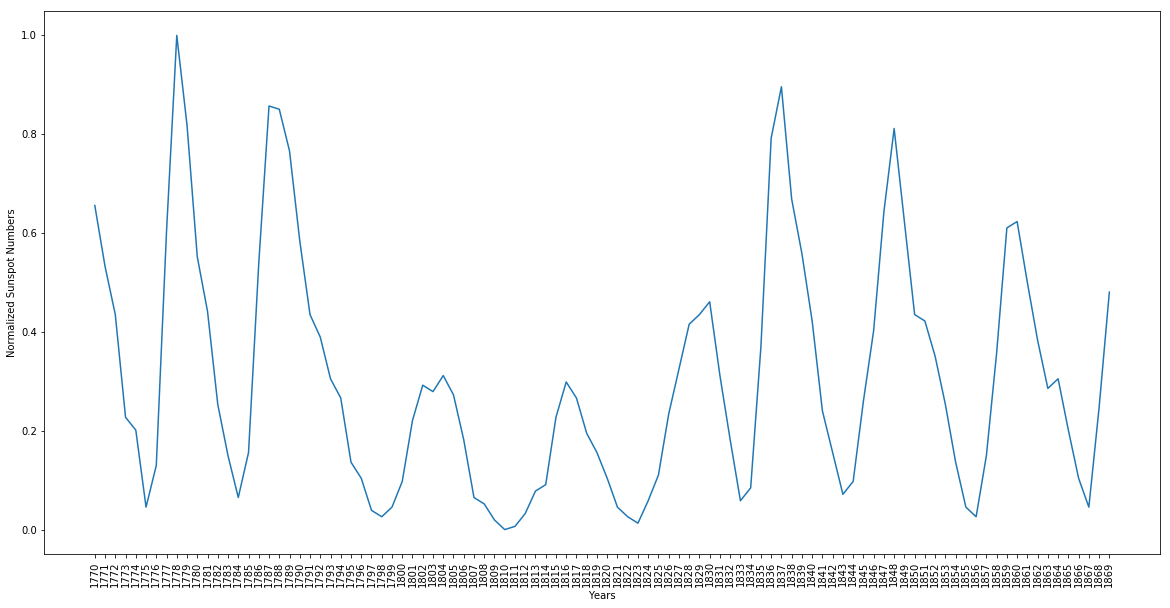

In [3]:
x_label = [str(i) for i in range(1770,1870)]
# lets take a look at our time series

fig, ax = plt.subplots(figsize=(20, 10))

ax.plot(x_label, dataset)
ax.set_xlabel('Years')
ax.set_xticklabels(x_label, rotation='vertical')
ax.set_ylabel('Normalized Sunspot Numbers')

In [4]:
def window_transform_series(series, window_size):
    # containers for input/output pairs
    X = []
    y = []

    # Take values from the given series and generate a sequence input/output pairs
   
    for i in range(len(series) - window_size):
        X.append(series[i:i+window_size])
        y.append(series[i+window_size])

    # reshape each 
    X = np.asarray(X)
    X.shape = (np.shape(X)[0:2])
    y = np.asarray(y)
    y.shape = (len(y),1)

    return X,y

In [5]:
# window the data using your windowing function
window_size = 7
X,y = window_transform_series(series = dataset,window_size = window_size)

In [6]:
# split our dataset into training / testing sets
train_test_split = int(np.ceil(2*len(y)/float(3)))   # set the split point

# partition the training set
X_train = X[:train_test_split,:]
y_train = y[:train_test_split]

# keep the last chunk for testing
X_test = X[train_test_split:,:]
y_test = y[train_test_split:]

# NOTE: to use keras's RNN LSTM module our input must be reshaped to [samples, window size, stepsize] 
X_train = np.asarray(np.reshape(X_train, (X_train.shape[0], window_size, 1)))
X_test = np.asarray(np.reshape(X_test, (X_test.shape[0], window_size, 1)))

In [7]:
model = Sequential()
model.add(LSTM(7, input_shape=(window_size,1), activation='relu'))   # Build a LSTM  model with 7 hidden units
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
unified_lstm (UnifiedLSTM)   (None, 7)                 252       
_________________________________________________________________
dense (Dense)                (None, 1)                 8         
Total params: 260
Trainable params: 260
Non-trainable params: 0
_________________________________________________________________


In [8]:
# build model using keras documentation recommended optimizer initialization
optimizer = tf.keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

# compile the model
model.compile(loss='mean_squared_error', optimizer=optimizer)


In [9]:
# run your model!
model.fit(X_train, y_train, epochs=1000, batch_size=50, verbose=1)

Epoch 1/1000
62/62 [==============================] - 3s 52ms/sample - loss: 0.1094
Epoch 2/1000
62/62 [==============================] - 0s 433us/sample - loss: 0.0990
Epoch 3/1000
62/62 [==============================] - 0s 429us/sample - loss: 0.0925
Epoch 4/1000
62/62 [==============================] - 0s 442us/sample - loss: 0.0879
Epoch 5/1000
62/62 [==============================] - 0s 407us/sample - loss: 0.0848
Epoch 6/1000
62/62 [==============================] - 0s 423us/sample - loss: 0.0816
Epoch 7/1000
62/62 [==============================] - 0s 441us/sample - loss: 0.0788
Epoch 8/1000
62/62 [==============================] - 0s 439us/sample - loss: 0.0761
Epoch 9/1000
62/62 [==============================] - 0s 466us/sample - loss: 0.0739
Epoch 10/1000
62/62 [==============================] - 0s 449us/sample - loss: 0.0723
Epoch 11/1000
62/62 [==============================] - 0s 446us/sample - loss: 0.0706
Epoch 12/1000
62/62 [==============================] - 0s 489us/

62/62 [==============================] - 0s 383us/sample - loss: 0.0453
Epoch 97/1000
62/62 [==============================] - 0s 383us/sample - loss: 0.0455
Epoch 98/1000
62/62 [==============================] - 0s 407us/sample - loss: 0.0449
Epoch 99/1000
62/62 [==============================] - 0s 354us/sample - loss: 0.0446
Epoch 100/1000
62/62 [==============================] - 0s 388us/sample - loss: 0.0444
Epoch 101/1000
62/62 [==============================] - 0s 400us/sample - loss: 0.0442
Epoch 102/1000
62/62 [==============================] - 0s 408us/sample - loss: 0.0440
Epoch 103/1000
62/62 [==============================] - 0s 434us/sample - loss: 0.0438
Epoch 104/1000
62/62 [==============================] - 0s 408us/sample - loss: 0.0435
Epoch 105/1000
62/62 [==============================] - 0s 442us/sample - loss: 0.0433
Epoch 106/1000
62/62 [==============================] - 0s 442us/sample - loss: 0.0432
Epoch 107/1000
62/62 [==============================] - 0s 45

62/62 [==============================] - 0s 452us/sample - loss: 0.0258
Epoch 191/1000
62/62 [==============================] - 0s 448us/sample - loss: 0.0249
Epoch 192/1000
62/62 [==============================] - 0s 453us/sample - loss: 0.0248
Epoch 193/1000
62/62 [==============================] - 0s 447us/sample - loss: 0.0246
Epoch 194/1000
62/62 [==============================] - 0s 405us/sample - loss: 0.0246
Epoch 195/1000
62/62 [==============================] - 0s 429us/sample - loss: 0.0244
Epoch 196/1000
62/62 [==============================] - 0s 434us/sample - loss: 0.0240
Epoch 197/1000
62/62 [==============================] - 0s 455us/sample - loss: 0.0242
Epoch 198/1000
62/62 [==============================] - 0s 442us/sample - loss: 0.0243
Epoch 199/1000
62/62 [==============================] - 0s 437us/sample - loss: 0.0238
Epoch 200/1000
62/62 [==============================] - 0s 452us/sample - loss: 0.0234
Epoch 201/1000
62/62 [==============================] - 0s

62/62 [==============================] - 0s 442us/sample - loss: 0.0169
Epoch 285/1000
62/62 [==============================] - 0s 425us/sample - loss: 0.0176
Epoch 286/1000
62/62 [==============================] - 0s 423us/sample - loss: 0.0157
Epoch 287/1000
62/62 [==============================] - 0s 415us/sample - loss: 0.0156
Epoch 288/1000
62/62 [==============================] - 0s 417us/sample - loss: 0.0158
Epoch 289/1000
62/62 [==============================] - 0s 447us/sample - loss: 0.0155
Epoch 290/1000
62/62 [==============================] - 0s 425us/sample - loss: 0.0162
Epoch 291/1000
62/62 [==============================] - 0s 412us/sample - loss: 0.0154
Epoch 292/1000
62/62 [==============================] - 0s 434us/sample - loss: 0.0178
Epoch 293/1000
62/62 [==============================] - 0s 432us/sample - loss: 0.0173
Epoch 294/1000
62/62 [==============================] - 0s 425us/sample - loss: 0.0167
Epoch 295/1000
62/62 [==============================] - 0s

62/62 [==============================] - 0s 405us/sample - loss: 0.0132
Epoch 379/1000
62/62 [==============================] - 0s 392us/sample - loss: 0.0131
Epoch 380/1000
62/62 [==============================] - 0s 417us/sample - loss: 0.0131
Epoch 381/1000
62/62 [==============================] - 0s 401us/sample - loss: 0.0155
Epoch 382/1000
62/62 [==============================] - 0s 414us/sample - loss: 0.0132
Epoch 383/1000
62/62 [==============================] - 0s 390us/sample - loss: 0.0143
Epoch 384/1000
62/62 [==============================] - 0s 401us/sample - loss: 0.0143
Epoch 385/1000
62/62 [==============================] - 0s 408us/sample - loss: 0.0149
Epoch 386/1000
62/62 [==============================] - 0s 407us/sample - loss: 0.0149
Epoch 387/1000
62/62 [==============================] - 0s 395us/sample - loss: 0.0130
Epoch 388/1000
62/62 [==============================] - 0s 375us/sample - loss: 0.0133
Epoch 389/1000
62/62 [==============================] - 0s

62/62 [==============================] - 0s 385us/sample - loss: 0.0117
Epoch 473/1000
62/62 [==============================] - 0s 361us/sample - loss: 0.0115
Epoch 474/1000
62/62 [==============================] - 0s 372us/sample - loss: 0.0126
Epoch 475/1000
62/62 [==============================] - 0s 415us/sample - loss: 0.0117
Epoch 476/1000
62/62 [==============================] - 0s 388us/sample - loss: 0.0130
Epoch 477/1000
62/62 [==============================] - 0s 396us/sample - loss: 0.0139
Epoch 478/1000
62/62 [==============================] - 0s 396us/sample - loss: 0.0120
Epoch 479/1000
62/62 [==============================] - 0s 397us/sample - loss: 0.0135
Epoch 480/1000
62/62 [==============================] - 0s 374us/sample - loss: 0.0115
Epoch 481/1000
62/62 [==============================] - 0s 374us/sample - loss: 0.0116
Epoch 482/1000
62/62 [==============================] - 0s 364us/sample - loss: 0.0113
Epoch 483/1000
62/62 [==============================] - 0s

62/62 [==============================] - 0s 397us/sample - loss: 0.0100
Epoch 567/1000
62/62 [==============================] - 0s 370us/sample - loss: 0.0101
Epoch 568/1000
62/62 [==============================] - 0s 411us/sample - loss: 0.0116
Epoch 569/1000
62/62 [==============================] - 0s 444us/sample - loss: 0.0132
Epoch 570/1000
62/62 [==============================] - 0s 440us/sample - loss: 0.0125
Epoch 571/1000
62/62 [==============================] - 0s 427us/sample - loss: 0.0103
Epoch 572/1000
62/62 [==============================] - 0s 422us/sample - loss: 0.0116
Epoch 573/1000
62/62 [==============================] - 0s 447us/sample - loss: 0.0111
Epoch 574/1000
62/62 [==============================] - 0s 429us/sample - loss: 0.0102
Epoch 575/1000
62/62 [==============================] - 0s 460us/sample - loss: 0.0102
Epoch 576/1000
62/62 [==============================] - 0s 472us/sample - loss: 0.0122
Epoch 577/1000
62/62 [==============================] - 0s

62/62 [==============================] - 0s 408us/sample - loss: 0.0089
Epoch 661/1000
62/62 [==============================] - 0s 411us/sample - loss: 0.0091
Epoch 662/1000
62/62 [==============================] - 0s 406us/sample - loss: 0.0097
Epoch 663/1000
62/62 [==============================] - 0s 418us/sample - loss: 0.0118
Epoch 664/1000
62/62 [==============================] - 0s 406us/sample - loss: 0.0091
Epoch 665/1000
62/62 [==============================] - 0s 431us/sample - loss: 0.0107
Epoch 666/1000
62/62 [==============================] - 0s 443us/sample - loss: 0.0096
Epoch 667/1000
62/62 [==============================] - 0s 434us/sample - loss: 0.0087
Epoch 668/1000
62/62 [==============================] - 0s 465us/sample - loss: 0.0089
Epoch 669/1000
62/62 [==============================] - 0s 435us/sample - loss: 0.0110
Epoch 670/1000
62/62 [==============================] - 0s 435us/sample - loss: 0.0102
Epoch 671/1000
62/62 [==============================] - 0s

62/62 [==============================] - 0s 404us/sample - loss: 0.0086
Epoch 755/1000
62/62 [==============================] - 0s 394us/sample - loss: 0.0080
Epoch 756/1000
62/62 [==============================] - 0s 401us/sample - loss: 0.0080
Epoch 757/1000
62/62 [==============================] - 0s 405us/sample - loss: 0.0080
Epoch 758/1000
62/62 [==============================] - 0s 396us/sample - loss: 0.0082
Epoch 759/1000
62/62 [==============================] - 0s 415us/sample - loss: 0.0080
Epoch 760/1000
62/62 [==============================] - 0s 369us/sample - loss: 0.0113
Epoch 761/1000
62/62 [==============================] - 0s 351us/sample - loss: 0.0123
Epoch 762/1000
62/62 [==============================] - 0s 398us/sample - loss: 0.0085
Epoch 763/1000
62/62 [==============================] - 0s 401us/sample - loss: 0.0080
Epoch 764/1000
62/62 [==============================] - 0s 354us/sample - loss: 0.0079
Epoch 765/1000
62/62 [==============================] - 0s

62/62 [==============================] - 0s 427us/sample - loss: 0.0100
Epoch 849/1000
62/62 [==============================] - 0s 430us/sample - loss: 0.0077
Epoch 850/1000
62/62 [==============================] - 0s 395us/sample - loss: 0.0074
Epoch 851/1000
62/62 [==============================] - 0s 406us/sample - loss: 0.0074
Epoch 852/1000
62/62 [==============================] - 0s 440us/sample - loss: 0.0078
Epoch 853/1000
62/62 [==============================] - 0s 402us/sample - loss: 0.0073
Epoch 854/1000
62/62 [==============================] - 0s 422us/sample - loss: 0.0074
Epoch 855/1000
62/62 [==============================] - 0s 419us/sample - loss: 0.0073
Epoch 856/1000
62/62 [==============================] - 0s 389us/sample - loss: 0.0082
Epoch 857/1000
62/62 [==============================] - 0s 399us/sample - loss: 0.0084
Epoch 858/1000
62/62 [==============================] - 0s 391us/sample - loss: 0.0097
Epoch 859/1000
62/62 [==============================] - 0s

62/62 [==============================] - 0s 380us/sample - loss: 0.0069
Epoch 943/1000
62/62 [==============================] - 0s 390us/sample - loss: 0.0070
Epoch 944/1000
62/62 [==============================] - 0s 441us/sample - loss: 0.0115
Epoch 945/1000
62/62 [==============================] - 0s 428us/sample - loss: 0.0074
Epoch 946/1000
62/62 [==============================] - 0s 434us/sample - loss: 0.0085
Epoch 947/1000
62/62 [==============================] - 0s 452us/sample - loss: 0.0070
Epoch 948/1000
62/62 [==============================] - 0s 475us/sample - loss: 0.0069
Epoch 949/1000
62/62 [==============================] - 0s 429us/sample - loss: 0.0069
Epoch 950/1000
62/62 [==============================] - 0s 435us/sample - loss: 0.0071
Epoch 951/1000
62/62 [==============================] - 0s 477us/sample - loss: 0.0082
Epoch 952/1000
62/62 [==============================] - 0s 469us/sample - loss: 0.0072
Epoch 953/1000
62/62 [==============================] - 0s

In [10]:
# generate predictions for training
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [11]:
# print out training and testing errors
training_error = model.evaluate(X_train, y_train, verbose=0)
print('training error = ' + str(training_error))

testing_error = model.evaluate(X_test, y_test, verbose=0)
print('testing error = ' + str(testing_error))

training error = 0.008235486524720345
testing error = 0.009583615697920322


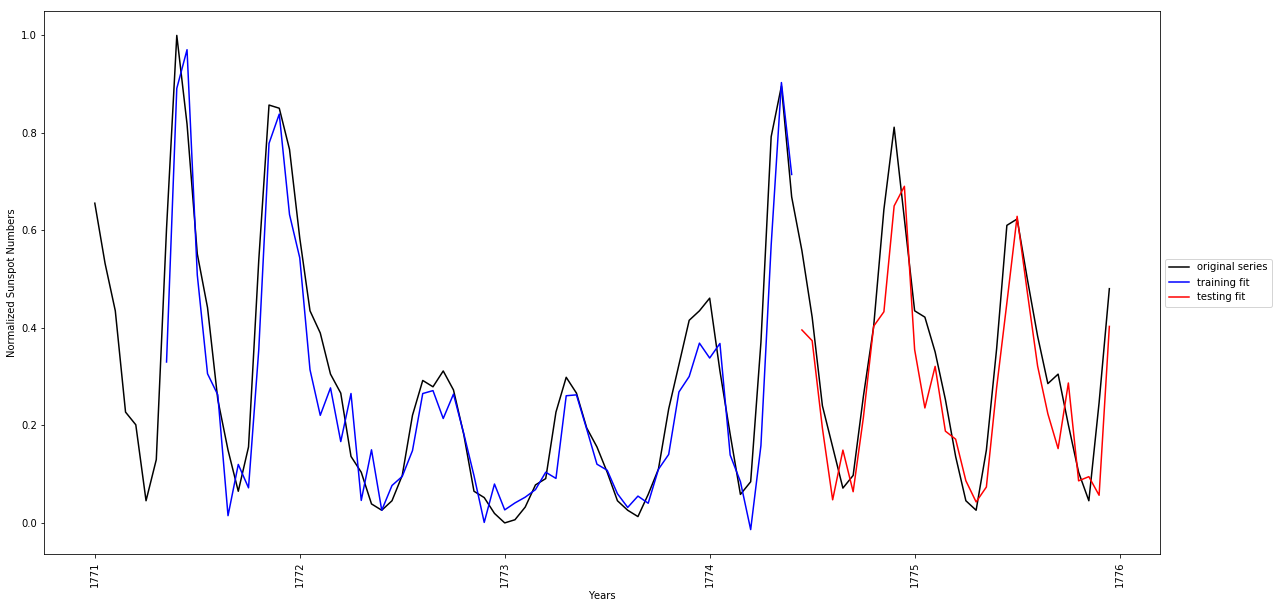

In [12]:
### Plot everything - the original series as well as predictions on training and testing sets
import matplotlib.pyplot as plt
%matplotlib inline

# plot original series
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(dataset,color = 'k')

# plot training set prediction
split_pt = train_test_split + window_size 
ax.plot(np.arange(window_size,split_pt,1),train_predict,color = 'b')

# plot testing set prediction
ax.plot(np.arange(split_pt,split_pt + len(test_predict),1),test_predict,color = 'r')

# pretty up graph
ax.set_xlabel('Years')
ax.set_xticklabels(x_label, rotation='vertical')
ax.set_ylabel('Normalized Sunspot Numbers')
ax.legend(['original series','training fit','testing fit'],loc='center left', bbox_to_anchor=(1, 0.5))
